**Description**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [162]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv('../data/creditcard.csv',sep=',')

In [164]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


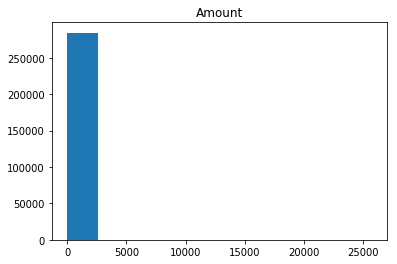

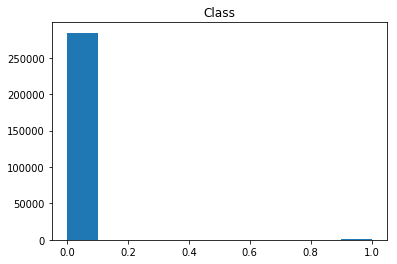

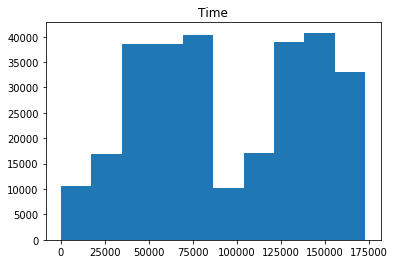

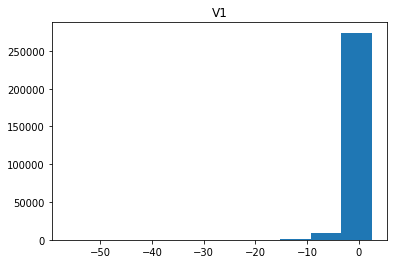

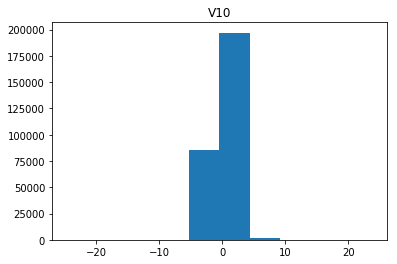

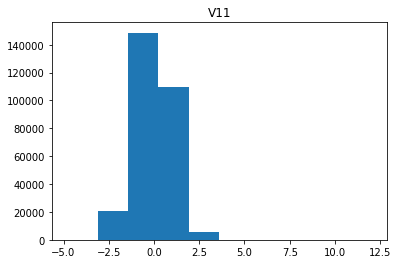

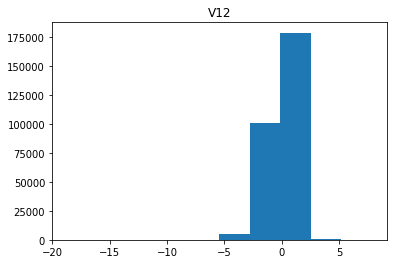

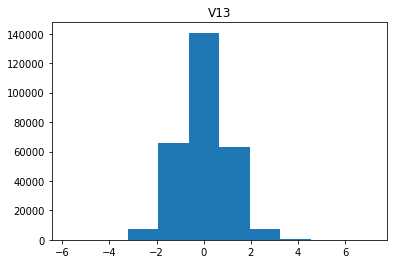

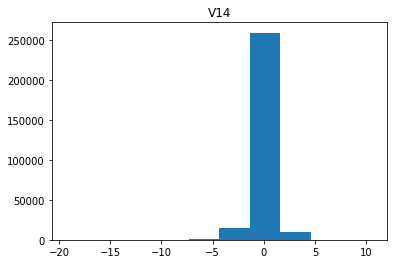

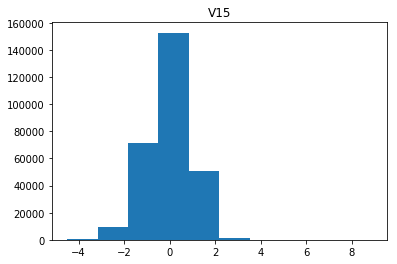

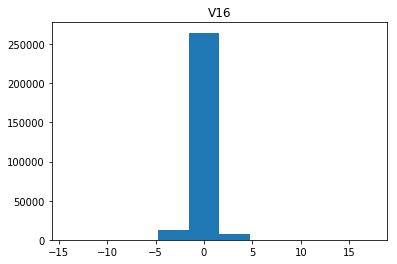

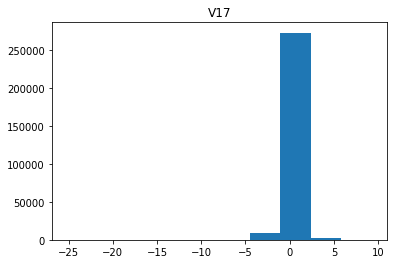

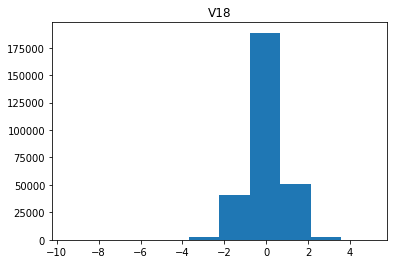

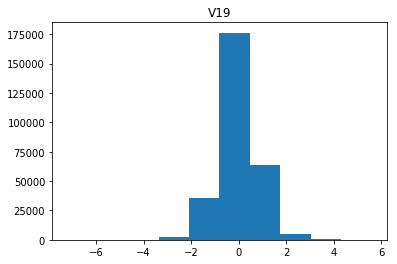

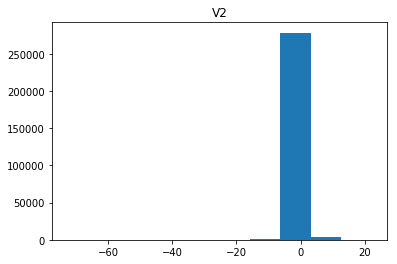

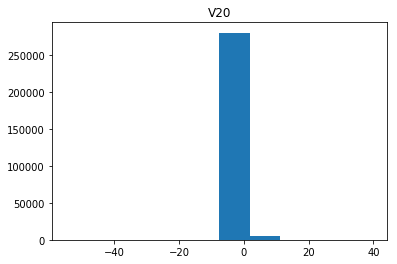

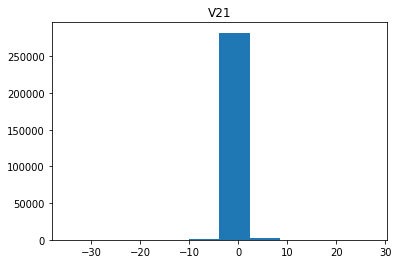

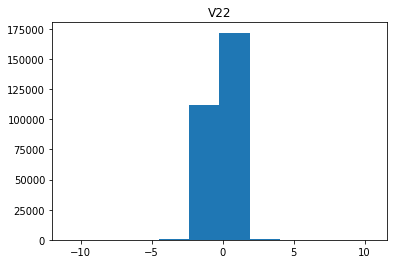

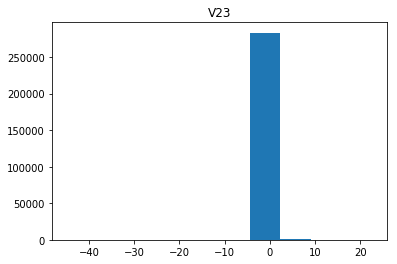

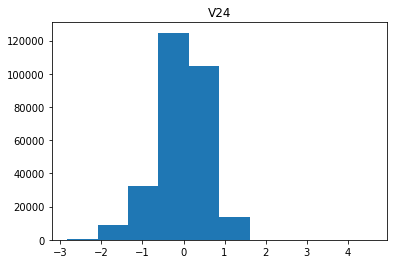

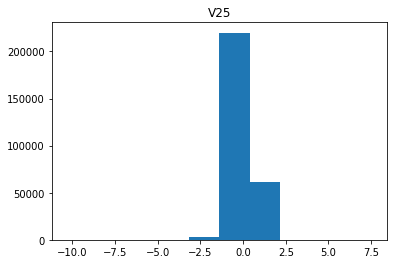

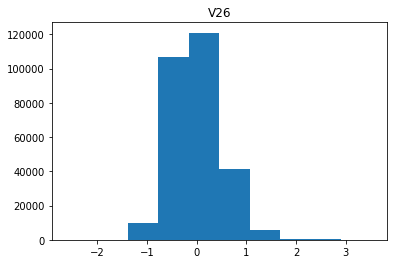

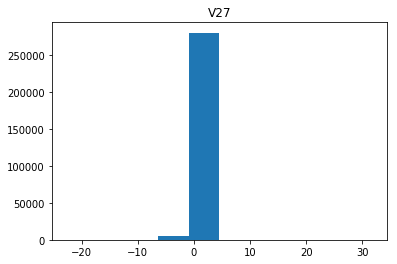

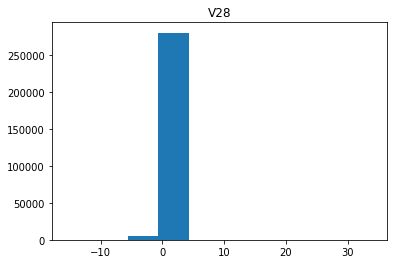

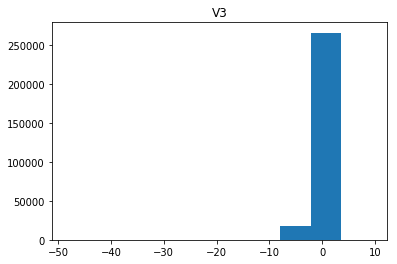

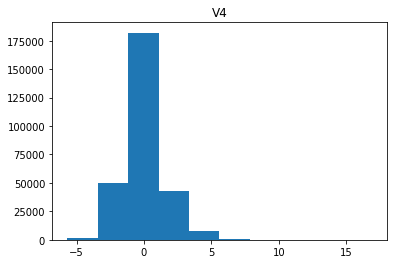

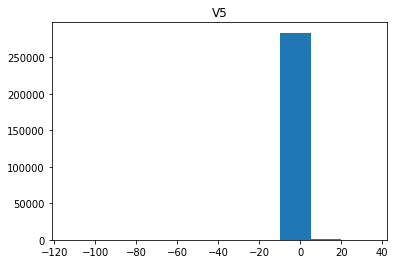

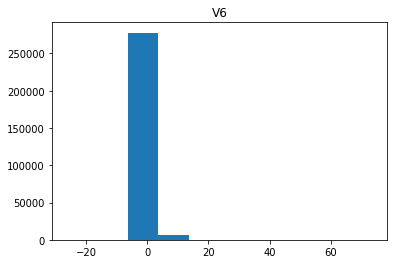

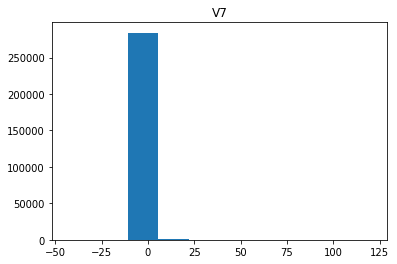

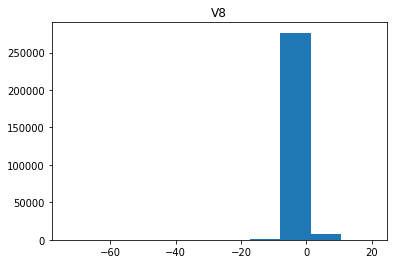

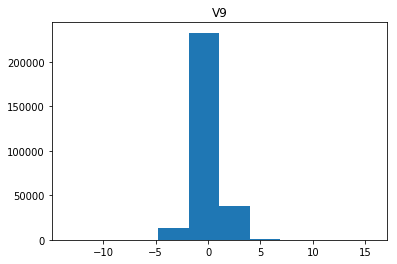

In [166]:
for col in sorted(df.columns):
    try:
        plt.hist(df[col].dropna(axis=0,how='all'))
        plt.title(col)
        plt.show()
    except Exception as e:
        print(e)

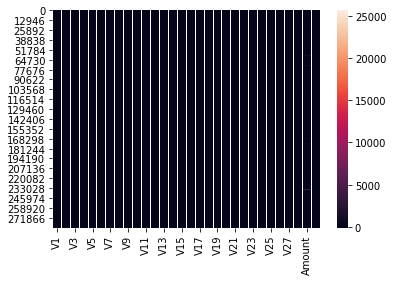

In [167]:
sns.heatmap(df.drop('Time',axis=1))

Let's take a look on a decision tree

In [168]:
X = df.drop('Class', axis='columns')
Y = df.loc[:,'Class']

In [169]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [170]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [171]:
Y.unique()

array([0, 1])

In [172]:
Y.isnull().sum()

0

Let's see each factor

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

%matplotlib inline

In [174]:
%load_ext autoreload
%autoreload 2

import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=87, stratify=Y)

In [176]:
Y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [177]:
Y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [178]:
model_tree = DecisionTreeClassifier(max_depth=5)

In [179]:
model_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
accuracy_score(Y_test,model_tree.predict(X_test))

0.9994557775359011

In [181]:
dot_data = export_graphviz(model_tree, 
                           out_file=None, 
                           feature_names=X.columns,
                           class_names=['ok', 'fraud'],  
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)

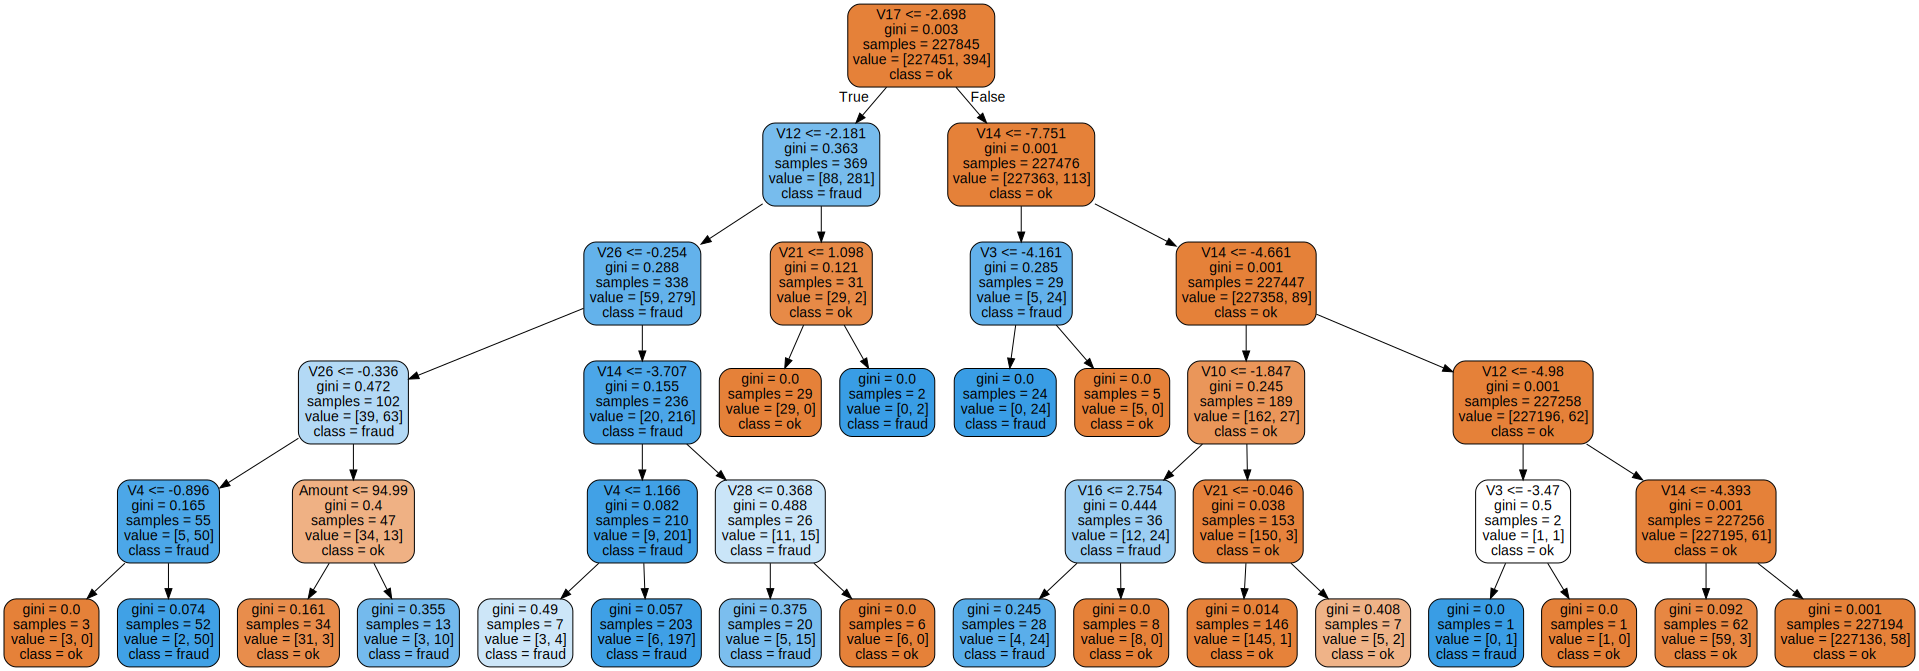

In [182]:
graph

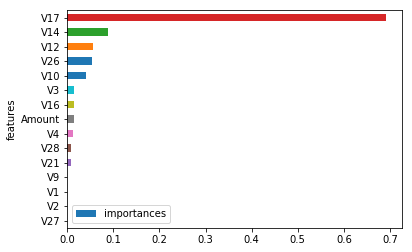

In [183]:
imps = pd.DataFrame({'importances' : model_tree.feature_importances_, 'features':X.columns}).sort_values('importances')[15:]
imps.plot(x='features',y='importances',kind='barh')
new_columns = imps.sort_values(by='importances', ascending=False).head(5)['features'].tolist()

In [184]:
new_columns

['V17', 'V14', 'V12', 'V26', 'V10']

In [185]:
for col in new_columns:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [186]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,V17_zscore,V14_zscore,V12_zscore,V26_zscore,V10_zscore
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,0.244863,-0.324610,-0.618296,-0.392170,0.083386
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,-0.135170,-0.149982,1.066089,0.261069,-0.153350
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,1.306868,-0.173114,0.066137,-0.288447,0.190700
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,-0.805445,-0.300360,0.178371,-0.460217,-0.050468
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,-0.279081,-1.168034,0.538627,1.041611,0.691625


## Reiniciando o estudo

Nós concluimos que o dataset não foi balanceado, vamos balancear e achar as variaveis mais relevantes

In [187]:
frauds = pd.read_csv('../data/creditcard.csv',sep=',')

In [188]:
frauds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Balanceando as amostras

In [189]:
frauds_true = frauds[frauds['Class']==1]
frauds_false = frauds[frauds['Class']==0]

In [190]:
frauds_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 541 to 281674
Data columns (total 31 columns):
Time      492 non-null float64
V1        492 non-null float64
V2        492 non-null float64
V3        492 non-null float64
V4        492 non-null float64
V5        492 non-null float64
V6        492 non-null float64
V7        492 non-null float64
V8        492 non-null float64
V9        492 non-null float64
V10       492 non-null float64
V11       492 non-null float64
V12       492 non-null float64
V13       492 non-null float64
V14       492 non-null float64
V15       492 non-null float64
V16       492 non-null float64
V17       492 non-null float64
V18       492 non-null float64
V19       492 non-null float64
V20       492 non-null float64
V21       492 non-null float64
V22       492 non-null float64
V23       492 non-null float64
V24       492 non-null float64
V25       492 non-null float64
V26       492 non-null float64
V27       492 non-null float64
V28       492 non-null

In [191]:
frauds_false_sample = frauds_false.sample(492, replace=False)
df = pd.concat([frauds_true,frauds_false_sample])

In [192]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,984.0,88147.358740,47750.380245,406.000000,47715.000000,80209.500000,132325.000000,172494.000000
V1,984.0,-2.308980,5.523783,-30.552380,-2.837530,-0.744641,1.103245,2.338247
V2,984.0,1.838345,3.641796,-8.966178,-0.148490,0.964356,2.793742,22.057729
V3,984.0,-3.557449,6.193959,-31.103685,-5.113334,-1.402553,0.240796,3.165284
V4,984.0,2.278618,3.180448,-3.829066,0.002928,1.332737,4.175332,12.114672
V5,984.0,-1.577173,4.271323,-23.611865,-1.759588,-0.400114,0.567205,11.095089
V6,984.0,-0.666218,1.833440,-6.406267,-1.541936,-0.636259,0.073837,16.493227
V7,984.0,-2.759623,5.904667,-43.557242,-3.078361,-0.608452,0.248013,21.437514
V8,984.0,0.276241,4.885192,-41.044261,-0.196746,0.160812,0.855025,20.007208
V9,984.0,-1.275502,2.304386,-13.434066,-2.279453,-0.687995,0.152634,3.515458


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

%matplotlib inline

In [194]:
%load_ext autoreload
%autoreload 2

import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
X = df.drop('Class',axis='columns')
Y = df['Class']

In [196]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=87)

In [197]:
Y_train.value_counts()

1    397
0    390
Name: Class, dtype: int64

In [198]:
Y_test.value_counts()

0    102
1     95
Name: Class, dtype: int64

In [199]:
model_tree = DecisionTreeClassifier(max_depth=5)

In [200]:
model_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

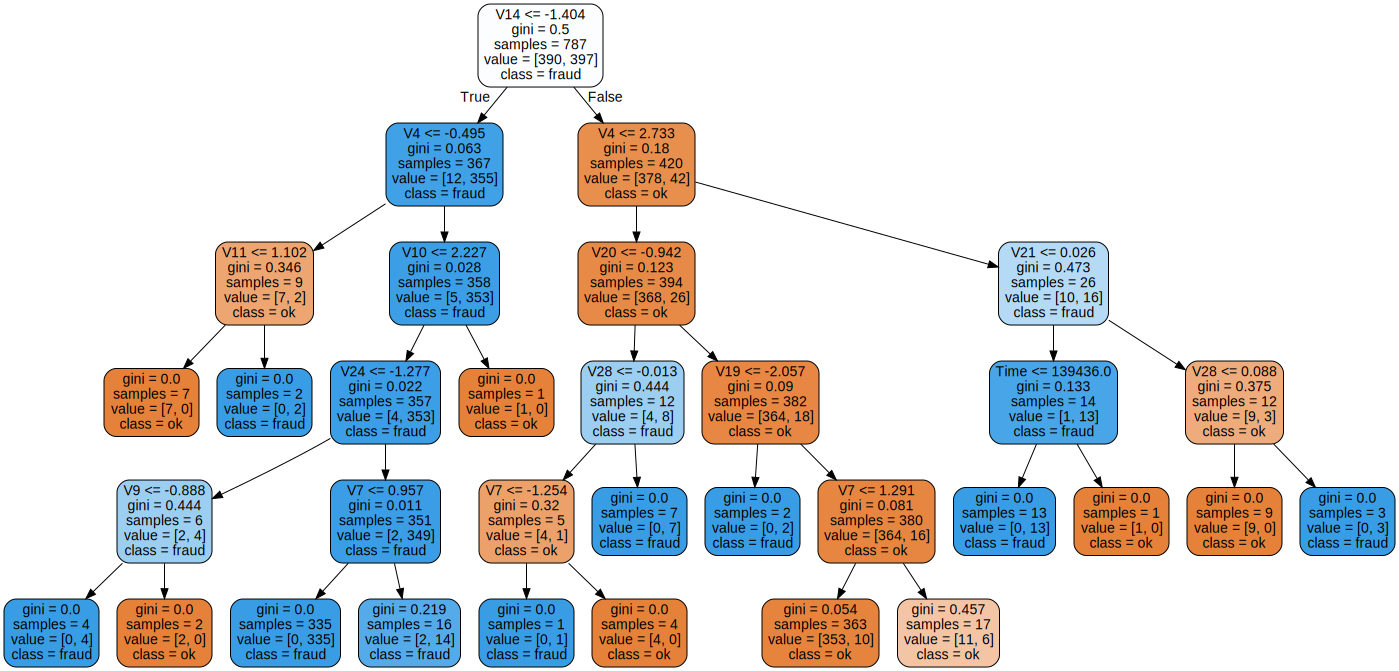

In [201]:
dot_data = export_graphviz(model_tree, 
                           out_file=None, 
                           feature_names=X.columns,
                           class_names=['ok', 'fraud'],  
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

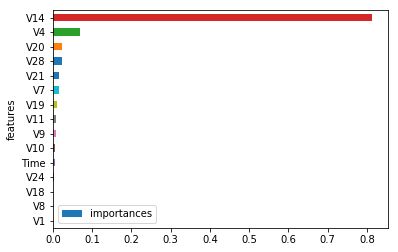

In [202]:
imps = pd.DataFrame({'importances' : model_tree.feature_importances_, 'features':X.columns}).sort_values('importances')[15:]
imps.plot(x='features',y='importances',kind='barh')

In [203]:
new_columns = imps.sort_values(by='importances', ascending=False).head(3)['features'].tolist()

In [204]:
df_X_train = X_train[new_columns] 

In [205]:
for col in new_columns:
    col_zscore = col + '_zscore'
    df_X_train[col_zscore] = (df_X_train[col] - df_X_train[col].mean())/df_X_train[col].std(ddof=0)

/home/rodrigo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [206]:
df_X_train.head()

,V14,V4,V20,V14_zscore,V4_zscore,V20_zscore
138566,-0.961264,-0.321950,-0.271242,0.553399,-0.827116,-0.381542
220197,-0.124219,-1.466831,1.444034,0.734296,-1.186602,1.131397
197586,-2.372552,-0.283073,-0.025862,0.248401,-0.814909,-0.165107
75235,-0.814342,0.321056,-0.047601,0.585151,-0.625217,-0.184283
258984,-0.828827,-0.741200,0.342403,0.582021,-0.958758,0.159716


In [207]:
df_outliers = df_X_train.copy()
outliers = {}
for col in new_columns:
    zscore_col = col + '_zscore'
    outlier_col = zscore_col + '_outlier'
    df_outliers[outlier_col] = ((df_X_train[zscore_col]>=1.96) | (df_X_train[zscore_col]<=-1.96))

In [208]:
df_outliers.head()

,V14,V4,V20,V14_zscore,V4_zscore,V20_zscore,V14_zscore_outlier,V4_zscore_outlier,V20_zscore_outlier
138566,-0.961264,-0.321950,-0.271242,0.553399,-0.827116,-0.381542,False,False,False
220197,-0.124219,-1.466831,1.444034,0.734296,-1.186602,1.131397,False,False,False
197586,-2.372552,-0.283073,-0.025862,0.248401,-0.814909,-0.165107,False,False,False
75235,-0.814342,0.321056,-0.047601,0.585151,-0.625217,-0.184283,False,False,False
258984,-0.828827,-0.741200,0.342403,0.582021,-0.958758,0.159716,False,False,False


In [209]:
df_outliers = df_outliers.join(Y_train)

In [210]:
df_outliers.head()

,V14,V4,V20,V14_zscore,V4_zscore,V20_zscore,V14_zscore_outlier,V4_zscore_outlier,V20_zscore_outlier,Class
138566,-0.961264,-0.321950,-0.271242,0.553399,-0.827116,-0.381542,False,False,False,0
220197,-0.124219,-1.466831,1.444034,0.734296,-1.186602,1.131397,False,False,False,0
197586,-2.372552,-0.283073,-0.025862,0.248401,-0.814909,-0.165107,False,False,False,1
75235,-0.814342,0.321056,-0.047601,0.585151,-0.625217,-0.184283,False,False,False,0
258984,-0.828827,-0.741200,0.342403,0.582021,-0.958758,0.159716,False,False,False,0


In [211]:
df_outliers_class_1 = df_outliers[df_outliers['Class']==1]

In [212]:
for col in new_columns:
    outlier_col = col + '_zscore' + '_outlier'
    print(outlier_col,'\n', df_outliers_class_1[outlier_col].value_counts(),'\n')

V14_zscore_outlier 
 False    349
True      48
Name: V14_zscore_outlier, dtype: int64 

V4_zscore_outlier 
 False    358
True      39
Name: V4_zscore_outlier, dtype: int64 

V20_zscore_outlier 
 False    368
True      29
Name: V20_zscore_outlier, dtype: int64 



Separamos todos os outliers e verificamos qual distribuição de fraudes

In [213]:
for col in new_columns:
    outlier_col = col + '_zscore' + '_outlier'
    df_out = df_outliers[df_outliers[outlier_col]==True]
    print(outlier_col,'\n', df_out['Class'].value_counts(),'\n')

V14_zscore_outlier 
 1    48
Name: Class, dtype: int64 

V4_zscore_outlier 
 1    39
Name: Class, dtype: int64 

V20_zscore_outlier 
 1    29
0     4
Name: Class, dtype: int64 



In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
#knn.score(X_train, y_train)
#knn.score(X_test, y_test)
y_predict=knn.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_logitpred=logreg.predict(X_test)
#print(y_logitpred)
print(confusion_matrix(y_test,y_logitpred))
print(classification_report(y_test,y_logitpred))
y_probreglog=logreg.predict_proba(X_test)[:,1]
#print(y_probreglog)
fpr, tpr, thresholds = roc_curve(y_test,y_probreglog)
#Grafico da curva ROC REGLOG
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,  tpr, label='Regressão Logística')
plt.title("Curva ROC Regressão Logística")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()
#Grafico da curva ROC KNN
y_probknn=knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_probknn)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,  tpr, label='KNN')
plt.title("Curva ROC KNN")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()